# Assignment 2  Random Walk Metrics

**Name:** Heriberto Zapata Solano 

**e-mail:** heriberto.zapata7939@alumnos.udg.mx

# Modules

In [9]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from scipy.spatial import distance
from scipy.stats import cauchy
from scipy.stats import levy_stable


# Load data from CSV files 

- *to be used in the next set of activities*

In [6]:
# Load CSV
bM3_dataf = pd.read_csv(r'C:\Users\herik\Downloads\csv\brownian_3.csv')
BM6_dataf = pd.read_csv(r'C:\Users\herik\Downloads\csv\brownian_6.csv')
CRW6_dataf = pd.read_csv(r'C:\Users\herik\Downloads\csv\crw_6_6.csv')
CRW9_dataf = pd.read_csv(r'C:\Users\herik\Downloads\csv\crw_6_9.csv')


# Activity 1: Path length - (BM1 vs BM2 vs CRW)
- Write a function that returns a Brownian Motion (BM) trajectory in pandas df.
- Write a function that returns a Correlated Random Walk (CRW) trajectory in pandas df.
- Write a function that returns the path length for a given trajectory.
- Compare at least the path length of three trajectories as shown in the figure below.
- Display the results using plotly.

*this function calculates the total distance traveled by an object moving from one point to another, given the sequence of points in the DataFrame.*

In [10]:
# Function to compute the accumulated path length
def Function_path_length(df):
    csv_coords = df[['x_pos', 'y_pos']].values
    accum_dist = [0]
    for i in range(1, len(csv_coords)):
        accum_dist.append(accum_dist[-1] + distance.euclidean(csv_coords[i-1], csv_coords[i]))
    return accum_dist


- use the `Function_path_length` in the data readed 

In [13]:
path_length_bm_3 = Function_path_length(bM3_dataf)
path_length_bm_6 = Function_path_length(BM6_dataf)
path_length_crw = Function_path_length(CRW6_dataf)

*Plot the results*

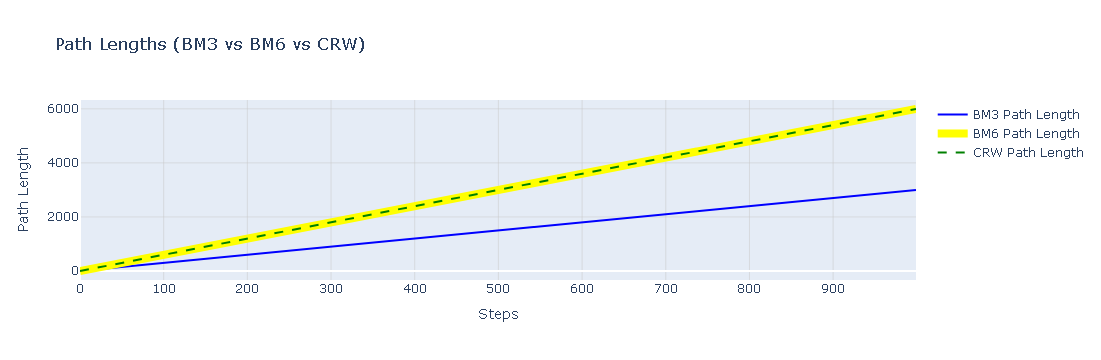

In [17]:
# Create a plotly figure
plot = go.Figure()

# Add paths from CSV files (accumulated length)
plot.add_trace(go.Scatter(
    x=list(range(len(path_length_bm_3))),
    y=path_length_bm_3,
    mode='lines',
    name='BM3 Path Length',
    line=dict(color='blue')
))

plot.add_trace(go.Scatter(
    x=list(range(len(path_length_bm_6))),
    y=path_length_bm_6,
    mode='lines',
    name='BM6 Path Length',
    line=dict(color='yellow', width=8)
))

plot.add_trace(go.Scatter(
    x=list(range(len(path_length_crw))),
    y=path_length_crw,
    mode='lines',
    name='CRW Path Length',
    line=dict(color='green',dash='dash')
))

# Set figure layout
plot.update_layout(
    title="Path Lengths (BM3 vs BM6 vs CRW)",
    xaxis_title="Steps",
    yaxis_title="Path Length",
    showlegend=True,
    xaxis_gridcolor='rgba(200, 200, 200, 0.5)',
    yaxis_gridcolor='rgba(200, 200, 200, 0.5)'
)

# Display the figure
plot.show()


# Activity 2: Mean Squared Displacement - (BM vs CRW) (4 pts)
- Write a function that returns the mean squared displacement for a given trajectory.
- Compare the mean squared displacement curves of at least two trajectories of
different kinds, as shown in the figure below.
- Display the results using plotly.

- Read an check the csv files

In [19]:
# Convert DataFrames to NumPy arrays for positions
BM_array = BM6_dataf[['x_pos', 'y_pos']].values
CRW_array = CRW6_dataf[['x_pos', 'y_pos']].values

# Load data from CSV files

display(pd.concat({'Brownian Motion': BM6_dataf, 'CRW': CRW6_dataf}, axis=1))

Brownian Motion                     CRW            
              x_pos       y_pos       x_pos       y_pos
0          2.000000    5.000000    2.000000    5.000000
1          4.811130   -0.300712   -3.692764    6.895372
2          5.248130    5.683353   -5.840528    1.292953
3         -0.198639    8.199840  -10.061820    5.556835
4         -2.650694   13.675918  -15.443752    2.904514
..              ...         ...         ...         ...
995      -83.186708 -300.312262  594.061618  306.742006
996      -87.144681 -295.802888  593.934953  300.743343
997      -86.776385 -289.814202  593.954299  294.743374
998      -82.612787 -294.134440  590.398341  289.910656
999      -81.985093 -300.101516  586.130551  285.693314

[1000 rows x 4 columns]

MSD formula implementation

$$
\text{MSD}(t) = \frac{1}{N - t} \sum_{i=1}^{N-t} \left| \mathbf{r}(i+t) - \mathbf{r}(i) \right|^2
$$


In [20]:
def calculate_msd(positions, n):
    num_steps = len(positions) - n
    msd = np.zeros(num_steps)  # Array to store MSD for each time

    # Calculate Euclidean distances for each time interval t
    for t in range(1, num_steps):
        squared_displacements = np.zeros(num_steps - t)

        # Calculate distances for each pair of positions separated by t steps
        for i in range(t, num_steps):
            displacement = distance.euclidean(positions[i], positions[i - t])
            squared_displacements[i - t] = displacement ** 2  # Square the displacement

        # Average squared displacements to obtain MSD at time t
        msd[t] = np.mean(squared_displacements)

    return msd



**formula/code relationship**

- $\frac{1}{N - n}$  is the implemetation `np.mean(squared_displacements)`

- $\sum_{i=1}^{N-n}$ is a bucle `for i in range(n, num_steps)`.

- $\left| r(i+t) - r(i) \right|^2$ is the `distance.euclidean(positions[i], positions[i - t]) ** 2.`

In [21]:
# Example usage with my data
n = 220
positions_bm = BM_array
positions_crw = CRW_array

msd_bm = calculate_msd(positions_bm, n)
msd_crw = calculate_msd(positions_crw, n)

# Create the Plotly figure
fig = go.Figure()

# Add the two MSD curves (BM and CRW)
fig.add_trace(go.Scatter(x=np.arange(len(msd_bm)), y=msd_bm, mode='lines', name='MSD BM'))
fig.add_trace(go.Scatter(x=np.arange(len(msd_crw)), y=msd_crw, mode='lines', name='MSD CRW'))

# Configure the plot layout
fig.update_layout(
    title='Mean Squared Displacement: BM vs CRW',
    xaxis_title='Time',
    yaxis_title='MSD',
    legend_title='Trajectories',
    plot_bgcolor='rgba(200, 200, 200, 0.5)'
)

# Display the plot
fig.show()